# Data Science Case Study: Music Popularity

This case study focues on a small dataset of spotify track records. The aim of this case study is to propose a framework to aim to quantify the popularity of a song. The dataset and inspiration of this project was taken from  an article of Aman Kharwal, founder of Statso (Check out his [LinkedIn](https://www.linkedin.com/in/aman-kharwal/)). This notebook involves the analysis of the features, taking a deep dive into the study of the features, and preparing the machine learning model. After preparing this model, I used streamlit to host a small application, which predicts if the song would be popular, purely based on the features of the audio.



The project is divided into-
1. Feature analysis
2. Multicolinearity & PCA, Feature selection
3. Feature selection & clustering 
5. Model Training,Evaluation and hyperparameter tuning
6. Steamlit, Spotify API and manual testing

Followed by post-project analysis of:
1. Training Parameter and Model Analysis 
2. Where can such a system be useful - Helping promote talent
3. How can this system be integrated and made bigger?



I started this project, with a vague idea in my mind. As a music enthusiast, I listen to as much music as possible in my leisure time. That has made me stumble upon, a simple (and frankly obvious) observation - there are a lot of artists who have songs and albums as some of the biggest stars in the world. These artists have been working underground over the years, probably waiting for their big break. Spotify, with it's commitment to unlock the potential for creators, does this already - with the clever use of features such as smart shuffle, playlists made for you, different types of mixes that pop up on your home page. This project if coupled with a large database has the potential to help serve this aim. This case study embodies my vision for data's potential to make a positive impact, nurturing talent and fostering a more inclusive, supportive community for creative expression.


Throughout this codebook, I have used numpy for array manipulation, pandas for data manipulation, seaborn and matplotlib for visualization, and scikit-learn for machine learning, and finally joblib which is used to save and load the model.

In [49]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.cluster import KMeans
import joblib

In [3]:
spotify = pd.read_csv('Spotify_data.csv')


In [ ]:
spotify.head()

,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0,Not Like Us,Kendrick Lamar,Not Like Us,5JjnoGJyOxfSZUZtk2rRwZ,6AI3ezQ4o3HUoP6Dhudph3,96,2024-05-04,274192,True,...,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061
1,1,Houdini,Eminem,Houdini,6Xuu2z00jxRPZei4IJ9neK,2HYFX63wP3otVIvopRS99Z,94,2024-05-31,227239,True,...,0.887,9,-2.760,0,0.0683,0.0292,0.000002,0.0582,0.889,127.003
2,2,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",BAND4BAND (feat. Lil Baby),4AzPr5SUpNF553eC1d3aRy,7iabz12vAuVQYyekFIWJxD,91,2024-05-23,140733,True,...,0.764,11,-5.241,1,0.2040,0.3590,0.000000,0.1190,0.886,140.113
3,3,I Don't Wanna Wait,"David Guetta, OneRepublic",I Don't Wanna Wait,0wCLHkBRKcndhMQQpeo8Ji,331l3xABO0HMr1Kkyh2LZq,90,2024-04-05,149668,False,...,0.714,1,-4.617,0,0.0309,0.0375,0.000000,0.2320,0.554,129.976
4,4,Pedro,"Jaxomy, Agatino Romero, Raffaella Carrà",Pedro,5y6RXjI5VPR0RyInghTbf1,48lxT5qJF0yYyf2z4wB4xW,89,2024-03-29,144846,False,...,0.936,9,-6.294,1,0.3010,0.0229,0.000001,0.3110,0.844,151.019


In [5]:
spotify.isna().sum()

Unnamed: 0          0
Track Name          0
Artists             0
Album Name          0
Album ID            0
Track ID            0
Popularity          0
Release Date        0
Duration (ms)       0
Explicit            0
External URLs       0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
dtype: int64

The dataset does not have any missing values (shoutout to Aman), and here is a short description of each feature.
1. Unnamed: index column.
2. Track Name: Name of the track.
3. Artists: Name of the artist(s).
4. Album Name: Name of the album.
4. Album ID: unique identifier for the album.
5. Track ID: unique identifier for the album.
6. Popularity: This is a metric that Spotify came up with, calculated using Number of plays, Recency, Share of total plays, user engagement & skip rate. Find out more info [here](https://www.loudlab.org/blog/spotify-popularity-leverage-algorithm/).
7. Duration (ms): Duration of the song in milliseconds.
8. Explicit: A binary flag; 1 means explicit and 0 means non-expicit.
9. External URLs: Link to the track.
10. Danceability: How suitable the track is for dancing.
11. Energy: Energy is from 0 to 1 and represents perceptual measure of intensity and activity.
12. Key: Key of the song.
13. Loudness: The overall loudness of a track in decibels (dB).
14. Mode:The modality of the track. 
15. Speechiness: Speechiness detects the presence of spoken words in a track
16. Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic.
17. Instrumentalness: Predicts whether a track contains no vocals. 
18. Liveness: Detects the presence of an audience in the recording.
19. Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
20. Tempo: The overall estimated tempo of a track in beats per minute (BPM).


In [6]:
spotify.columns

Index(['Unnamed: 0', 'Track Name', 'Artists', 'Album Name', 'Album ID',
       'Track ID', 'Popularity', 'Release Date', 'Duration (ms)', 'Explicit',
       'External URLs', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode',
       'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo'],
      dtype='object')

The unnamed column is just index we can directly remove it, and for the column Release Date - we can convert it into a continuous integer range.

In [7]:
# removing the unnamed column
spotify_data = spotify.drop(columns='Unnamed: 0')

In [12]:
# Using the release data, for which need to convert it into datetime format
spotify_data['Release Date'] = pd.to_datetime(spotify_data['Release Date'])
spotify_data['Release Date ordinal'] = spotify_data['Release Date'].apply(lambda x: x.toordinal())

For this segment, let us analyze the features with our predictor variable - Popularity and record the relation between each feature and popularity.

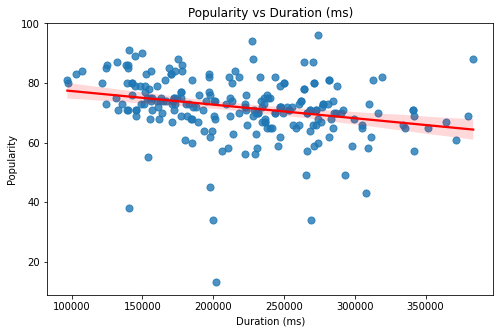

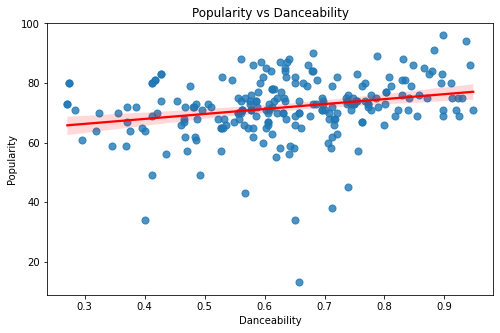

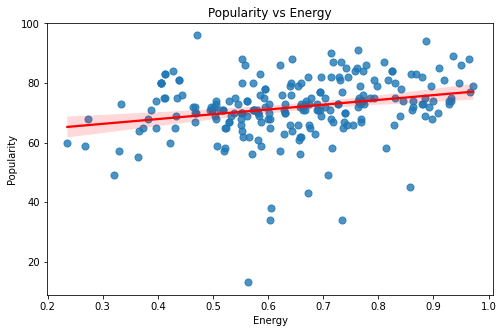

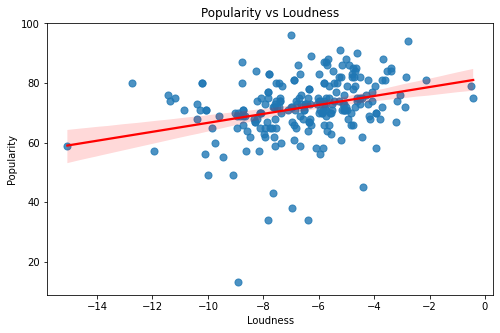

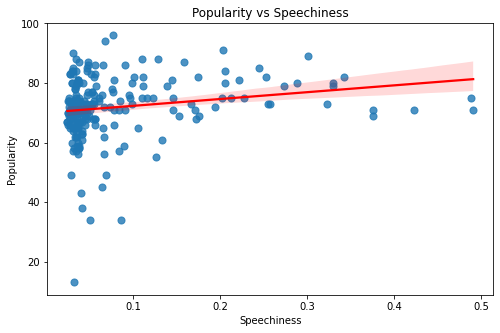

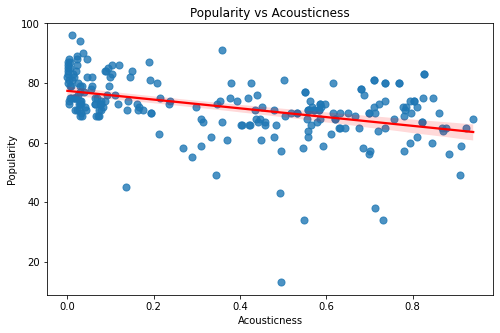

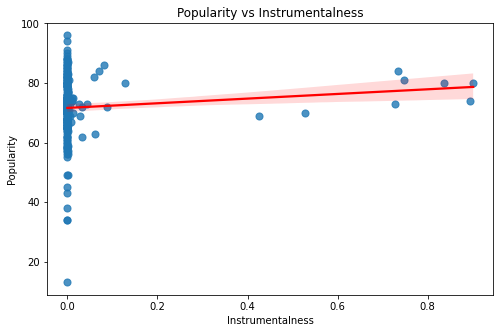

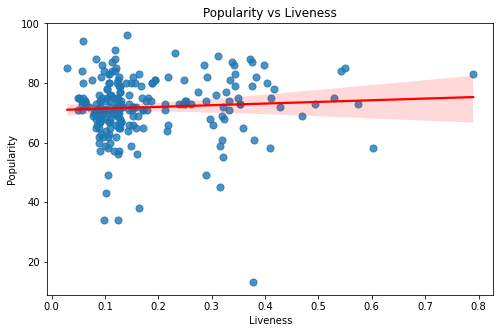

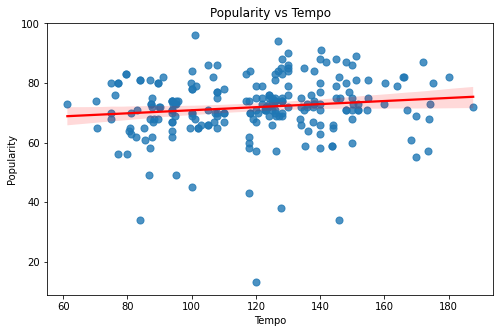

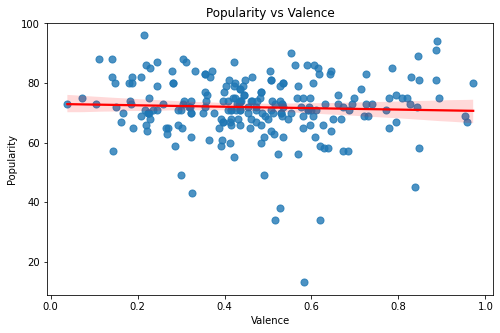

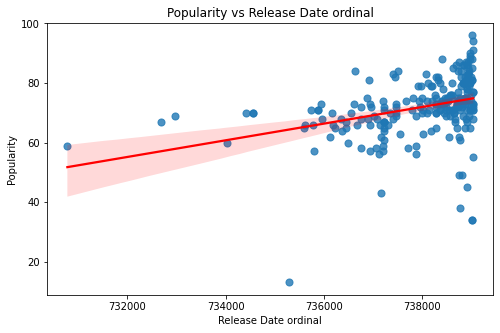

In [13]:

features = ['Duration (ms)','Danceability','Energy','Loudness','Speechiness','Acousticness','Instrumentalness','Liveness','Tempo','Valence', 'Release Date ordinal']
for feature in features:
    plt.figure(figsize=(8,5))
    sns.regplot(data = spotify_data, x=feature, y='Popularity', scatter_kws={'s': 50}, line_kws={'color': 'red'})
    plt.title(f'Popularity vs {feature}')
    plt.show()

For the features Duration (ms), Danceability, Energy, Loudness, Speechiness, Acousticness, Tempo, Valence, Liveness have either a positive or a negative correlation with popularity. This correlation is rather small in magnitude. For the remaining two features: Instrumentalness & Release Date the data is rather cluttered to one side, which is a potential bias in the data.

We would now analyze the correlation between all the features to check for any multicolinearity that may arise; since reading the description it seems warranted that there might be some overlap.

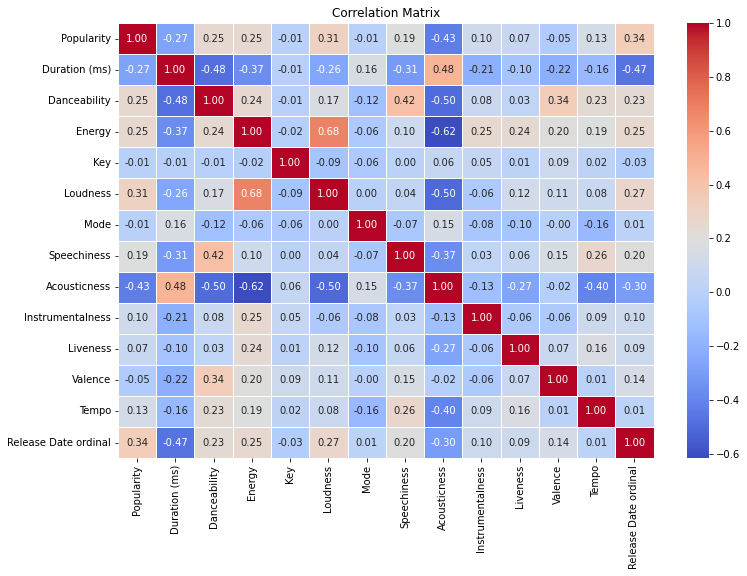

In [14]:
# Finding the correlation
numeric_columns = spotify_data.select_dtypes(include=['float64', 'int64']).columns
numeric_data = spotify_data[numeric_columns]

corr_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

I can see there are some high correlation magnitudes. The highest one is Loudness and Energy - which only makes sense. The other one is the relation between acousticness and energy. From these two I am keeping the relation between acousticness and energy as I think they both capture different variances. However for loudness and energy, it is safe to assume that these two have much more overlap.

To solve the problem of multicolinearity, let us perform PCA to create a new feature 'energy_loudness_pca' which captures the principal component from both the features 'Energy' & 'Loudness'.

### Dealing with multicolinearity - PCA Approach

In [17]:
pca = PCA(n_components=1)
spotify_data['energy_loudness_pca'] = pca.fit_transform(spotify_data[['Energy', 'Loudness']])

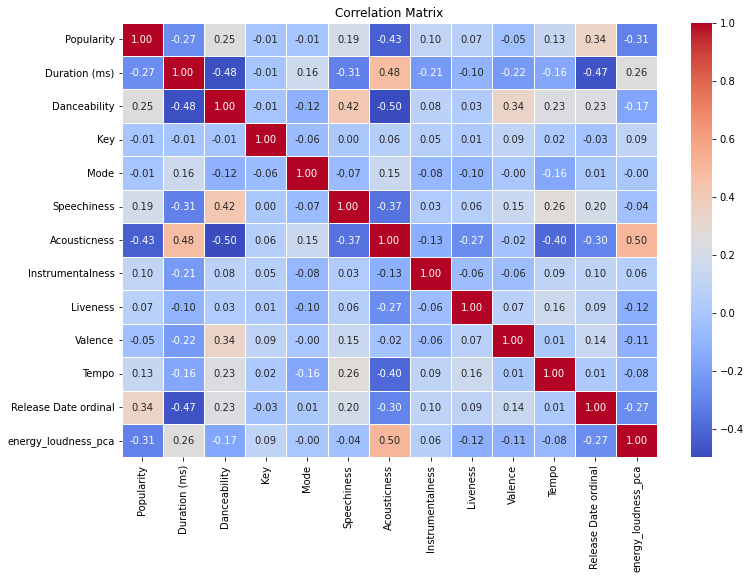

In [25]:
# Finding the correlation
numeric_columns = spotify_data.select_dtypes(include=['float64', 'int64']).columns
numeric_data = spotify_data[numeric_columns]
#Removing unnecessary columns
numeric_data = numeric_data.drop(columns=['Energy','Loudness'])
corr_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

After performing PCA, the multicolinearity problem between energy and loudness is resolved as well as the correlation of Acousticness with energy_loudness_pca is also reduced. This solves the problem of multicolinearity.

Now, to determine which features to keep our machine learning model. As previously discussed, the goal of this model to determine what makes a song popular and hopefully use specific song characteristics to determine if the song would be popular or not. To select the features, let us compare the correlation of these features with the r-squared coefficient. The r-squared coefficient helps explain, how much % of the variance in variable 1- Popularity and variable 2 - the other variable.

In [26]:
#Now using these columns with correlation coefficient and computing their r-square to determine the features to use:
import numpy as np
linear_regression_results = pd.DataFrame(columns=['Feature','Correlation','r-squared'])
new_features = ['Duration (ms)', 'Danceability', 'Key', 'Mode',
       'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Release Date ordinal', 'energy_loudness_pca']



for feature in new_features:
    correlation = numeric_data['Popularity'].corr(numeric_data[feature])



    slope, intercept = np.polyfit(numeric_data[feature],numeric_data['Popularity'],1)

    predicted_values = slope * numeric_data[feature] + intercept

    residuals = numeric_data['Popularity'] - predicted_values
    ss_total = np.sum((numeric_data['Popularity'] - np.mean(numeric_data[feature]))**2)
    ss_residual = np.sum(residuals**2)

    r_squared_2 = 1 - (ss_residual/ss_total)

    new_rows_2 = pd.DataFrame({'Feature':[feature],'Correlation': [correlation],'r-squared':[r_squared_2]})
    linear_regression_results = pd.concat([linear_regression_results,new_rows_2],ignore_index=True)


In [28]:
# Sorting by absolute mangitude
linear_regression_results['Abs_Correlation'] = linear_regression_results['Correlation'].abs()
sorted_results = linear_regression_results.sort_values(by=['Abs_Correlation', 'r-squared'], ascending=[False, False]).reset_index(drop=True)
sorted_results = sorted_results.drop(columns=['Abs_Correlation'])


In [29]:
sorted_results

,Feature,Correlation,r-squared
0,Acousticness,-0.431117,0.983693
1,Release Date ordinal,0.341856,1.000000
2,energy_loudness_pca,-0.308268,0.982059
3,Duration (ms),-0.269510,1.000000
4,Danceability,0.251928,0.981107
5,Speechiness,0.190621,0.980853
6,Tempo,0.131820,0.956739
7,Instrumentalness,0.104846,0.980377
8,Liveness,0.066110,0.980165
9,Valence,-0.045580,0.979958


Key and Mode are categorical variables, and they do not have any strong correlation at all. We can safely drop them.

In [30]:
# removing mode, key, valence
numeric_data = numeric_data.drop(columns=['Key','Mode'])

In [31]:
numeric_data.columns

Index(['Popularity', 'Duration (ms)', 'Danceability', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Release Date ordinal', 'energy_loudness_pca'],
      dtype='object')

### Model Training, Evaluation and Selection

Above are the final columns, that we can use in our machine learning model.

Now creating a helper function to evaluate the model, and then I would go on to fit 3 models.
1. Linear Regression
2. XGBoost
3. Random Forest Classifier

In [35]:
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r_squared = r2_score(y_true, y_pred)
    return rmse, r_squared


In [ ]:
# Assuming your DataFrame is `numeric_data_2` and contains the 'Popularity' column
X = numeric_data.drop(columns=['Popularity'])
y = numeric_data['Popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for models that are sensitive to feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
# Baseline model - Linear Regression
from sklearn.linear_model import LinearRegression

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate
rmse_lr, r2_lr = evaluate_model(y_test, y_pred_lr)
print(f"Linear Regression - RMSE: {rmse_lr}, R-squared: {r2_lr}")


Linear Regression - RMSE: 7.972829856960111, R-squared: 0.044975222211579124


In [37]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate
rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)
print(f"Random Forest - RMSE: {rmse_rf}, R-squared: {r2_rf}")


Random Forest - RMSE: 6.290022464880046, R-squared: 0.4055791422891225


In [40]:
from xgboost import XGBRegressor

# Train the XGBoost model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
rmse_xgb, r2_xgb = evaluate_model(y_test, y_pred_xgb)
print(f"XGBoost - RMSE: {rmse_xgb}, R-squared: {r2_xgb}")


XGBoost - RMSE: 6.745216516504173, R-squared: 0.3164324522283033


From the 3 models, XGBoost and Random Forest Classifier are the ones that are very close in accuracy. Now we would move forward to find out best parameters for both of these using gridsearch, and then compare the performance of the final accuracies to make a final decision!

In [41]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor

# Set up the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit GridSearchCV
rf_grid_search.fit(X_train, y_train)

# Get the best parameters and best score
rf_best_params = rf_grid_search.best_params_
rf_best_score = -rf_grid_search.best_score_  # Convert to positive since it's negative MSE

print("Best Parameters for Random Forest:", rf_best_params)
print("Best RMSE Score for Random Forest:", rf_best_score**0.5)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE Score for Random Forest: 9.613139897485826


In [42]:
from xgboost import XGBRegressor

# Set up the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize the model
xgb_model = XGBRegressor(random_state=42)

# Initialize GridSearchCV
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit GridSearchCV
xgb_grid_search.fit(X_train, y_train)

# Get the best parameters and best score
xgb_best_params = xgb_grid_search.best_params_
xgb_best_score = -xgb_grid_search.best_score_  # Convert to positive since it's negative MSE

print("Best Parameters for XGBoost:", xgb_best_params)
print("Best RMSE Score for XGBoost:", xgb_best_score**0.5)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
Best RMSE Score for XGBoost: 9.510254316183103


In [43]:
# Random Forest - Best Model Evaluation
rf_best_model = rf_grid_search.best_estimator_
y_pred_rf_best = rf_best_model.predict(X_test)
rf_rmse_best, rf_r2_best = evaluate_model(y_test, y_pred_rf_best)

print(f"Random Forest - Best RMSE: {rf_rmse_best}, Best R-squared: {rf_r2_best}")

# XGBoost - Best Model Evaluation
xgb_best_model = xgb_grid_search.best_estimator_
y_pred_xgb_best = xgb_best_model.predict(X_test)
xgb_rmse_best, xgb_r2_best = evaluate_model(y_test, y_pred_xgb_best)

print(f"XGBoost - Best RMSE: {xgb_rmse_best}, Best R-squared: {xgb_r2_best}")


Random Forest - Best RMSE: 6.01374071034327, Best R-squared: 0.4566507836345939
XGBoost - Best RMSE: 6.093559011080316, Best R-squared: 0.44213169292862586


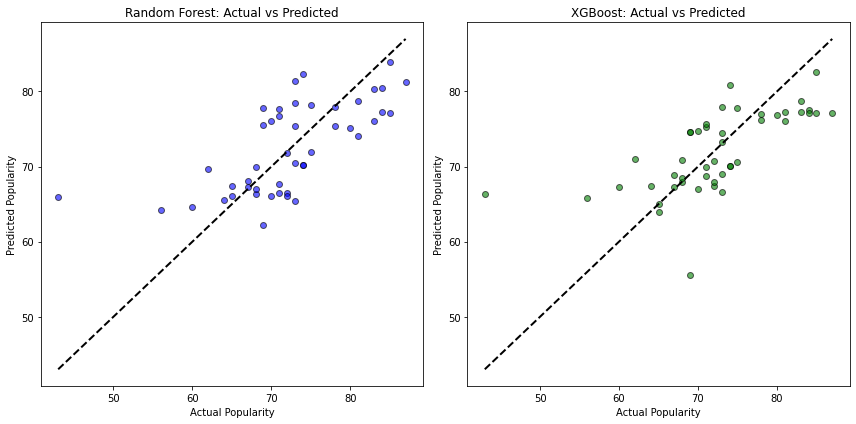

In [46]:
# Regression Line Analysis

# Predictions from the best models
y_pred_rf_best = rf_best_model.predict(X_test)
y_pred_xgb_best = xgb_best_model.predict(X_test)

# Scatter Plot
plt.figure(figsize=(12, 6))

# Random Forest Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf_best, alpha=0.6, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Random Forest: Actual vs Predicted')

# XGBoost Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb_best, alpha=0.6, color='green', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('XGBoost: Actual vs Predicted')

plt.tight_layout()
plt.show()


Both the plots of Random Forest and XGBoost are almost the same. Let us look at the residuals plot of the same.

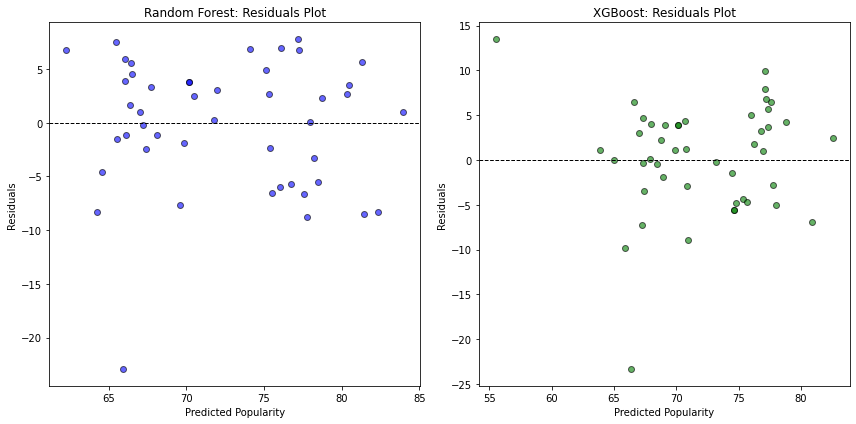

In [47]:
# Calculate residuals
residuals_rf = y_test - y_pred_rf_best
residuals_xgb = y_test - y_pred_xgb_best

plt.figure(figsize=(12, 6))

# Random Forest Residual Plot
plt.subplot(1, 2, 1)
plt.scatter(y_pred_rf_best, residuals_rf, alpha=0.6, color='blue', edgecolors='k')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Predicted Popularity')
plt.ylabel('Residuals')
plt.title('Random Forest: Residuals Plot')

# XGBoost Residual Plot
plt.subplot(1, 2, 2)
plt.scatter(y_pred_xgb_best, residuals_xgb, alpha=0.6, color='green', edgecolors='k')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Predicted Popularity')
plt.ylabel('Residuals')
plt.title('XGBoost: Residuals Plot')

plt.tight_layout()
plt.show()


The wide range of residuals could represent multiple things.

The data might be missing key patterns, and it is an indication of underfitting; and the model needs complexity. This makes sense as the dataset that I have used is quite small, and the patterns it captures are expected to be weaker. Moreover there are a few outliers, that were also noticed during the intial graphs of popularity vs the features. These outliers might result in a wider range as well.

Furthermore, our end goal is to determine if a song is either likely to be not popular, moderately popular or highly popular, we need to determine a range for each cluster. This can be calculated using K means to divide the data points into 3 different clusters and deciding on thresholds for each cluster. 

In [50]:
# Clustering to find out the range of popularity
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_data[['Duration (ms)', 'Danceability', 'Speechiness', 
                                                      'Acousticness', 'Instrumentalness', 'Liveness', 
                                                      'Valence', 'Tempo', 'energy_loudness_pca','Release Date ordinal']])

kmeans = KMeans(n_clusters=3, random_state=42)
numeric_data['Popularity Class'] = kmeans.fit_predict(scaled_features)



/Users/yashtobre/Documents/Data Science Case Studies/Music case strategies/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [53]:
numeric_data['cluster'] = kmeans.fit_predict(X)

/Users/yashtobre/Documents/Data Science Case Studies/Music case strategies/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [54]:
# Calculate the mean popularity score for each cluster
cluster_popularity_mapping = numeric_data.groupby('cluster')['Popularity'].mean()

# You will use this mapping to assign a "popularity score" to each cluster
print(cluster_popularity_mapping)


cluster
0    69.753247
1    69.138462
2    75.823529
Name: Popularity, dtype: float64


Based on this mapping - A song would be classified as not popular if it's popularity is less than 69.75 and is classified as moderately popular if the popularity is in the range of 69.75 to 69.13; and highly popular if it is greater than 75.82.

Then we proceed to save the model results in a dataframe and then save the models as a pkl files, which then would be deployed to the repositories. These would then be connected to streamlit cloud, with the access to spotify API, and then the app would be hosted.

In [58]:
'''
joblib.dump(rf_best_model,'song_popularity_model.pkl')
joblib.dump(kmeans,'kmeans_model.pkl')
joblib.dump(pca,'pca_model.pkl')
joblib.dump(scaler,'scaler.pkl')

'''

"\njoblib.dump(rf_best_model,'song_popularity_model.pkl')\njoblib.dump(kmeans,'kmeans_model.pkl')\njoblib.dump(pca,'pca_model.pkl')\njoblib.dump(scaler,'scaler.pkl')\n\n"

In [55]:
data = {
    "Model": ["Linear Regression", "Random Forest", "XGBoost", "Random Forest (Best)", "XGBoost (Best)"],
    "RMSE": [7.972829856960111, 6.290022464880046, 6.745216516504173, 6.01374071034327, 6.093559011080316],
    "R-squared": [0.044975222211579124, 0.4055791422891225, 0.3164324522283033, 0.4566507836345939, 0.44213169292862586]
}

# Creating the DataFrame
accuracy_df = pd.DataFrame(data)

# Display the DataFrame
print(accuracy_df)

                  Model      RMSE  R-squared
0     Linear Regression  7.972830   0.044975
1         Random Forest  6.290022   0.405579
2               XGBoost  6.745217   0.316432
3  Random Forest (Best)  6.013741   0.456651
4        XGBoost (Best)  6.093559   0.442132


Analysis of the algorithms:

Based on the intial graphs of the data, it was very clear that a linear relationship could not explain the complete complexity of the data, which corrosponds with a poor R-sqaured score of 0.04. For the rest two models, having 2 tree based model is a good choice for the type of data we have, since popularity is assumed to be a combination of different factors. Using tree models is a naive attempt to capture the creativity of music and the evolving nature it has. The nature of these models explain why we have the better score for Random Forest and XGBoost. From XGBoost and Random Forest, the probable reason for this could be since random forest works well on a diverse set of features, while XGBoost is based on iteration and requires large amount of data to perform well.

This Project was then implemented on Streamlit, you can find the code for the app [here](https://github.com/Yash-Tobre/song-popularity-prediction)!

Thank you to Aman Kharwal for providing this dataset and his own approach on how to apporach this Case Study, which you can find [here](https://statso.io/case-studies/). 